# Database Analytics

In [1]:
%matplotlib inline
import pandas as pd
import mysql.connector

In [2]:
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="",
    database = "pharmagelder"
)

In [3]:
df_recipient = pd.read_sql("""SELECT log_recipient.log_timestamp as timestamp, recipient.rec_name, rec_location, rec_type  FROM pharmagelder.log_recipient LEFT JOIN recipient ON log_fk_recipient = recipient.rec_id ORDER BY log_timestamp""", con=db_connection)
df_pharma = pd.read_sql("SELECT log_pharma.log_timestamp as timestamp, pharma.pha_name FROM log_pharma LEFT JOIN pharma ON log_fk_pharma = pha_id ORDER BY log_timestamp DESC", con=db_connection)

In [4]:
df_all = pd.concat([df_recipient, df_pharma], sort=False)

## Pharmas

In [12]:
df_pharma.groupby('pha_name').count().sort_values('timestamp', ascending=False)

,timestamp
pha_name,
Novartis,1119
Roche Pharma AG,651
A. Menarini AG,604
Vifor Pharma,498
Bayer AG,477
Mepha,363
AstraZeneca,359
Pfizer AG,357
Amgen,354


## Per Hour

In [5]:
#Add Hour
df_all['hour'] = df_all['timestamp'].apply(lambda x: x.hour)
df_all['day'] = df_all['timestamp'].apply(lambda x: x.day)

In [6]:
group = df_all.groupby('hour').count()
group

,timestamp,rec_name,rec_location,rec_type,pha_name,day
hour,,,,,,
0,1754,1501,1501,1501,253,1754
1,1153,1002,1002,1002,151,1153
2,1548,1357,1357,1357,191,1548
3,1126,899,899,899,227,1126
4,12256,12164,12164,12164,92,12256
5,1836,1626,1626,1626,210,1836
6,4225,3806,3806,3806,419,4225
7,6201,5598,5598,5598,603,6201
8,6865,6075,6075,6075,790,6865


In [7]:
df_mai = df_all[(df_all.timestamp >= '2020-05-01') & (df_all.timestamp <= '2020-05-31')]
len(df_mai)

2494

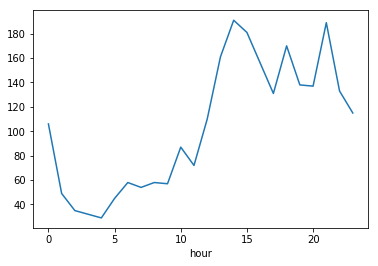

In [8]:
df_mai.groupby('hour').count()['timestamp'].plot()

In [9]:
#AVG per Hour
df_group = df_mai.groupby(['day', 'hour']).agg({'timestamp': 'count'}).reset_index()
df_day = df_group.groupby('hour').mean()
df_day

,day,timestamp
hour,,
0,15.000000,4.818182
1,17.933333,3.266667
2,16.250000,2.187500
3,14.875000,2.000000
4,15.437500,1.812500
5,14.166667,2.500000
6,13.526316,3.052632
7,15.900000,2.700000
8,14.700000,2.900000


In [95]:
df_workday = df_day[(df_day.index >= 8) & (df_day.index <= 22)]
df_workday['timestamp'].mean()

6.219024405546145

In [96]:
df_day['timestamp'].mean()

5.045793192632438

In [101]:
df_most = df_recipient.groupby(['rec_type', 'rec_name']).agg({'timestamp': 'count'}).reset_index()
df_most = df_most.sort_values('timestamp', ascending=False)

df_most_rec = df_most[df_most.rec_type == 'hcp']
df_most_rec.head()

,rec_type,rec_name,timestamp
10282,hcp,Rolf A. Stahel,625
2567,hcp,Adrian Ciurea,451
6645,hcp,Jan Steffel,387
5322,hcp,Erich Seifritz,332
5665,hcp,Frank Ruschitzka,291


In [102]:
df_most_rec = df_most[df_most.rec_type == 'hco']
df_most_rec.head()

,rec_type,rec_name,timestamp
2265,hco,UniversitätsSpital Zürich,495
498,hco,ERS European Respiratory Society ERS Headquarters,460
2267,hco,Universitätsspital Basel,426
1002,hco,Insel Gruppe AG,348
1085,hco,Kantonsspital St. Gallen,326
